In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from PIL import Image
import logging

In [2]:
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert('L')  # 转换为灰度图
    airfoils_array = np.array(image)
    airfoils_array = airfoils_array / 255.0  # 归一化
    airfoils_array = np.expand_dims(airfoils_array, axis=-1)  # 增加一个维度以匹配模型输入
    return airfoils_array

In [3]:
# 加载并预处理图片
image_folder_path = 'airfoils_img'  # 替换为你的图片文件夹路径
# 获取image_folder_path路径下的所有文件，并存储在image_files列表中
image_files = [f for f in os.listdir(image_folder_path) if os.path.isfile(os.path.join(image_folder_path, f))]
input_images = [load_and_preprocess_image(os.path.join(image_folder_path, f)) for f in image_files]
input_images = np.array(input_images)

In [4]:
# 打乱数据集
indices = np.arange(input_images.shape[0])
np.random.shuffle(indices)
input_data = input_images[indices]
# 计算验证集的大小（10%）
val_size = int(input_data.shape[0] * 0.1)
# 划分数据集
x_train = input_data[val_size:]
x_test = input_data[:val_size]
print(len(x_train),len(x_test))

18 2


In [11]:
print(x_train.shape)
print(type(x_train))

(18, 256, 256, 1)
<class 'numpy.ndarray'>


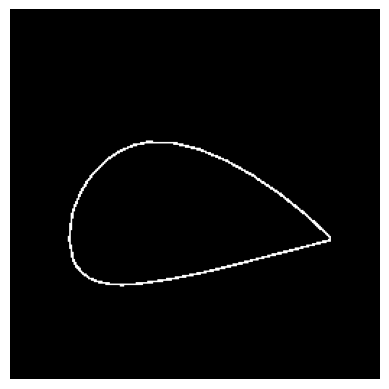

In [5]:
plt.axis('off')
plt.imshow(x_train[0].squeeze(), cmap='Greys_r')